# Implementing Models

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [3]:
# Reading the data from the cleaned CSV file
# file_path = "/content/drive/Shareddrives/DATA_228_Project/cleaned_playstore.csv"
# playstore = pd.read_csv(file_path)

In [4]:
# Reading the data from the cleaned CSV file
path = "cleaned_playstore.csv"
playstore = pd.read_csv(path)

___

### One-hot Encoding for "In App Purchases"

In [5]:
# One-hot encoding for 'In App Purchases'
playstore_encoded = pd.get_dummies(playstore, columns=['In App Purchases'], drop_first=True)

# Display the updated DataFrame
playstore_encoded.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,Editors Choice,Scraped Time,Popularity,In App Purchases_True
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10,15,True,0.0,...,jean21101999@gmail.com,2020-02-26,2020-02-26,Everyone,https://beniyizibyose.tk/projects/,False,False,6/15/21 20:19,Low,0
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000,7662,True,0.0,...,webserveis@gmail.com,2020-05-21,2021-05-06,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,6/15/21 20:19,High,0
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50,58,True,0.0,...,vnacrewit@gmail.com,2019-08-09,2019-08-19,Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,6/15/21 20:19,Low,0
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10,19,True,0.0,...,climatesmarttech2@gmail.com,2018-09-10,2018-10-13,Everyone,Default Privacy Policy,True,False,6/15/21 20:19,Low,0
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100,478,True,0.0,...,rmilekhorodyski@gmail.com,2020-02-21,2018-11-12,Everyone,http://www.horodyski.com.pl,False,False,6/15/21 20:19,Low,0


___

### One-hot Encoding for "Ad Supported"

In [6]:
# One-hot encoding for 'In App Purchases'
playstore_encoded = pd.get_dummies(playstore, columns=['Ad Supported'], drop_first=True)

# Display the updated DataFrame
playstore_encoded.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,In App Purchases,Editors Choice,Scraped Time,Popularity,Ad Supported_True
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10,15,True,0.0,...,jean21101999@gmail.com,2020-02-26,2020-02-26,Everyone,https://beniyizibyose.tk/projects/,False,False,6/15/21 20:19,Low,0
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000,7662,True,0.0,...,webserveis@gmail.com,2020-05-21,2021-05-06,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,False,False,6/15/21 20:19,High,1
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50,58,True,0.0,...,vnacrewit@gmail.com,2019-08-09,2019-08-19,Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,6/15/21 20:19,Low,0
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10,19,True,0.0,...,climatesmarttech2@gmail.com,2018-09-10,2018-10-13,Everyone,Default Privacy Policy,False,False,6/15/21 20:19,Low,1
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100,478,True,0.0,...,rmilekhorodyski@gmail.com,2020-02-21,2018-11-12,Everyone,http://www.horodyski.com.pl,False,False,6/15/21 20:19,Low,0


---

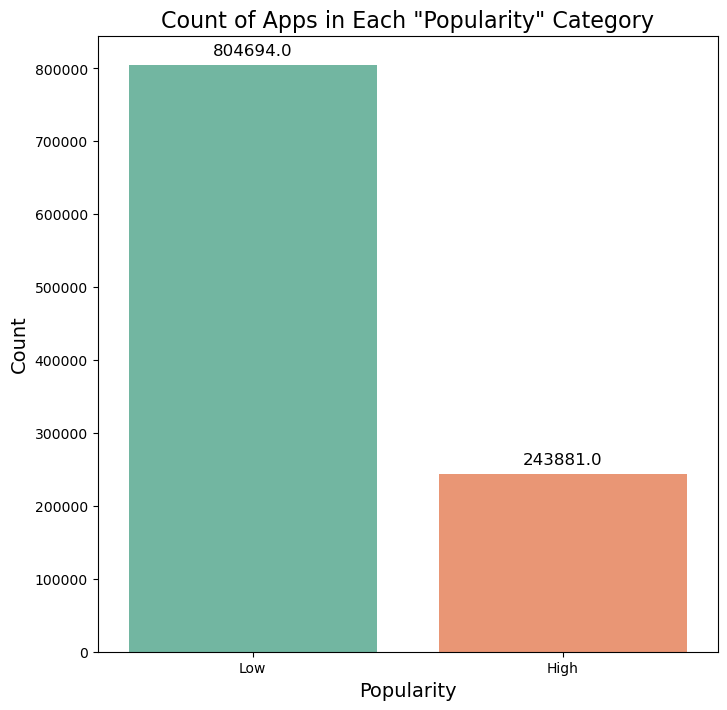

In [7]:
# Creating a new column 'Popularity_Num' to map 1 to 'High' and 0 to 'Low'
playstore['Popularity_Num'] = playstore['Popularity'].map({'High': 1, 'Low': 0})

# Count plot for 'Popularity' with count displayed at the top of each bar
plt.figure(figsize=(8, 8))
sns.countplot(x='Popularity', data=playstore, palette='Set2')

# Annotate the count at the top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.title('Count of Apps in Each "Popularity" Category', fontsize=16)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

___

### Handling the imbalance before implementing the Machine Learning Models
### Oversampling the minority class i.e "High"

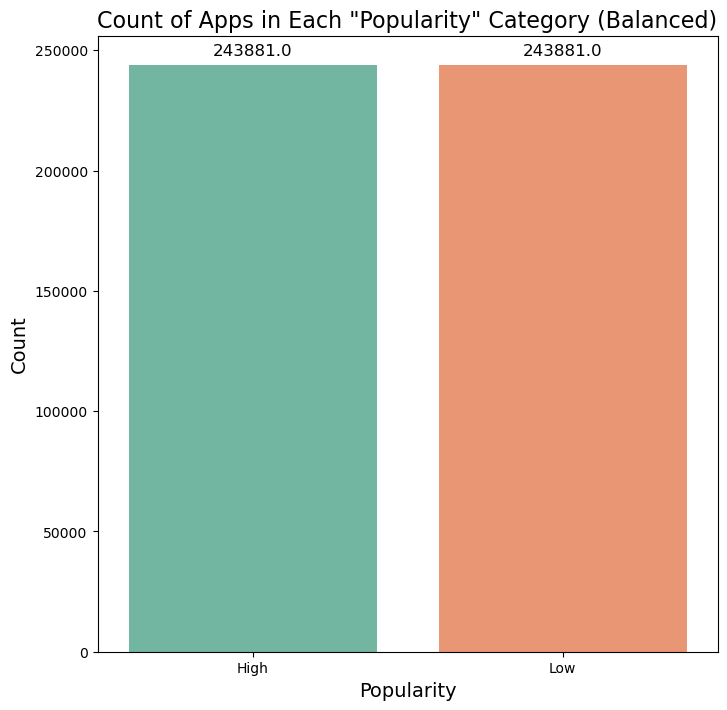

In [8]:
from sklearn.utils import resample

# Separating the majority and minority classes
majority_class = playstore[playstore['Popularity_Num'] == 1]
minority_class = playstore[playstore['Popularity_Num'] == 0]

# Oversampling the minority class
oversampled_minority = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combining the oversampled minority class with the original majority class
balanced_data = pd.concat([majority_class, oversampled_minority])

# Shuffling the dataset
balanced_data = balanced_data.sample(frac=1, random_state=42)

# Displaying the count plot for the balanced dataset
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='Popularity', data=balanced_data, palette='Set2')

# Annotating the count at the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.title('Count of Apps in Each "Popularity" Category (Balanced)', fontsize=16)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

___

In [9]:
# Features (X) and target variable (Y)
X = balanced_data[['Rating', 'Ad Supported', 'In App Purchases']]
Y = balanced_data['Popularity_Num']

# Splitting the data into training and testing sets (75% training, 25% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Displaying the shape of the training and testing sets
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

Training set shape: (365821, 3) (365821,)
Testing set shape: (121941, 3) (121941,)


### MODEL 1: Logistic Regression

In [10]:
# Initializing the logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Training the model on the training set
logreg_model.fit(X_train, Y_train)

# Predicting the target variable on the training set
Y_train_pred = logreg_model.predict(X_train)

# Predicting the target variable on the testing set
Y_test_pred = logreg_model.predict(X_test)

# Evaluating the model on the training set
training_accuracy = accuracy_score(Y_train, Y_train_pred)
print("Training Accuracy:", training_accuracy)

# Evaluating the model on the testing set
testing_accuracy = accuracy_score(Y_test, Y_test_pred)
print("Testing Accuracy:", testing_accuracy)

# Displaying the classification report for the testing set
classification_rep = classification_report(Y_test, Y_test_pred)
print("Classification Report (Testing Set):\n", classification_rep)

# Predicting the probabilities on the testing set
Y_test_probs = logreg_model.predict_proba(X_test)[:, 1]

# Overall precision on the testing set
overall_precision_logreg = precision_score(Y_test, Y_test_pred)
print("Overall Precision for Logistic Regression:", overall_precision_logreg)

Training Accuracy: 0.7720387839954513
Testing Accuracy: 0.7714796499946696
Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       0.86      0.65      0.74     60966
           1       0.72      0.89      0.80     60975

    accuracy                           0.77    121941
   macro avg       0.79      0.77      0.77    121941
weighted avg       0.79      0.77      0.77    121941

Overall Precision for Logistic Regression: 0.7178768376304603


### Tried Threshold Tuning but there was only a <u>slight increase in the overall precision</u>

Classification Report with Adjusted Threshold (Testing Set):
               precision    recall  f1-score   support

           0       0.91      0.63      0.74     60966
           1       0.72      0.94      0.81     60975

    accuracy                           0.78    121941
   macro avg       0.81      0.78      0.78    121941
weighted avg       0.81      0.78      0.78    121941

Accuracy with Adjusted Threshold: 0.7823127578091044
Overall Precision with Adjusted Threshold for Logistic Regression: 0.7151283397065807
True Positives (TP): 57226
True Negatives (TN): 38170
False Positives (FP): 22796
False Negatives (FN): 3749


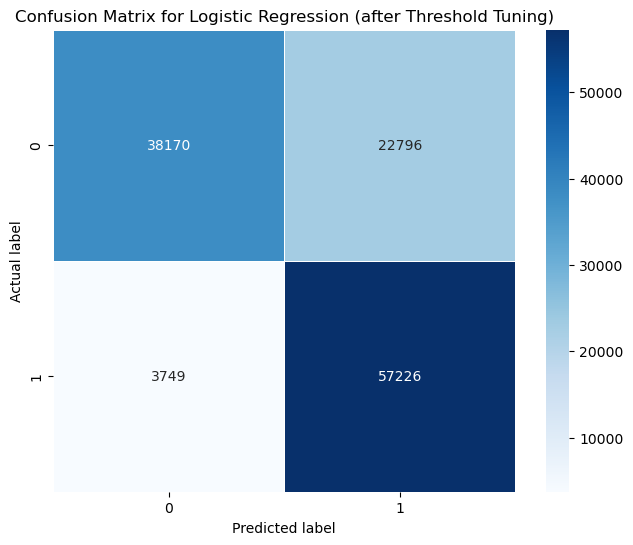

In [11]:
# Adjusting the classification threshold to 0.4
threshold = 0.4
Y_test_pred_thresh = (logreg_model.predict_proba(X_test)[:, 1] >= threshold).astype(int)

# Evaluating the model with the adjusted threshold
precision_thresh = precision_score(Y_test, Y_test_pred_thresh)
recall_thresh = recall_score(Y_test, Y_test_pred_thresh)
f1_thresh = f1_score(Y_test, Y_test_pred_thresh)

# Displaying the classification report for the testing set with the adjusted threshold
classification_rep_thresh = classification_report(Y_test, Y_test_pred_thresh)
print("Classification Report with Adjusted Threshold (Testing Set):\n", classification_rep_thresh)

# Calculating accuracy for the adjusted threshold
accuracy_thresh = accuracy_score(Y_test, Y_test_pred_thresh)
print("Accuracy with Adjusted Threshold:", accuracy_thresh)

# Overall precision with adjusted threshold on the testing set
overall_precision_thresh = precision_score(Y_test, Y_test_pred_thresh)
print("Overall Precision with Adjusted Threshold for Logistic Regression:", overall_precision_thresh)

# Computing confusion matrix for the adjusted threshold
cm_thresh = confusion_matrix(Y_test, Y_test_pred_thresh)

# Extracting TP, TN, FP, FN from confusion matrix
TN, FP, FN, TP = cm_thresh.ravel()

# Displaying TP, TN, FP, FN along with the confusion matrix
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Plotting confusion matrix for the adjusted threshold
plt.figure(figsize=(8, 6))
sns.heatmap(cm_thresh, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True)
plt.title('Confusion Matrix for Logistic Regression (after Threshold Tuning)')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

___

___

### MODEL 2: K-NN (K-Nearest Neighbor)

In [12]:
# Initializing the KNN model
knn_model = KNeighborsClassifier()

# Training the model on the training set
knn_model.fit(X_train, Y_train)

# Predicting the target variable on the training set
Y_train_pred_knn = knn_model.predict(X_train)

# Predicting the target variable on the testing set
Y_test_pred_knn = knn_model.predict(X_test)

# Evaluating the KNN model on the training set
training_accuracy_knn = accuracy_score(Y_train, Y_train_pred_knn)
print("KNN Training Accuracy:", training_accuracy_knn)

# Evaluating the KNN model on the testing set
testing_accuracy_knn = accuracy_score(Y_test, Y_test_pred_knn)
print("KNN Testing Accuracy:", testing_accuracy_knn)

# Displaying the classification report for the testing set
classification_rep_knn = classification_report(Y_test, Y_test_pred_knn)
print("KNN Classification Report (Testing Set):\n", classification_rep_knn)

# Overall precision on the testing set
overall_precision_knn = precision_score(Y_test, Y_test_pred_knn)
print("Overall Precision for KNN:", overall_precision_knn)

KNN Training Accuracy: 0.7779487782276031
KNN Testing Accuracy: 0.7756291977267695
KNN Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       0.81      0.72      0.76     60966
           1       0.75      0.83      0.79     60975

    accuracy                           0.78    121941
   macro avg       0.78      0.78      0.77    121941
weighted avg       0.78      0.78      0.77    121941

Overall Precision for KNN: 0.748209407073765


### Tried Hyperparameter Tuning for K-NN on a small subset of dataset but there was only a <u>slight increase in the overall precision</u>

Best Hyperparameters for KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best KNN Testing Accuracy: 0.7660015909333202
Best KNN Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       0.79      0.73      0.76     60966
           1       0.75      0.81      0.77     60975

    accuracy                           0.77    121941
   macro avg       0.77      0.77      0.77    121941
weighted avg       0.77      0.77      0.77    121941

Overall Precision for Best KNN Model: 0.7464934275510979
True Positives (TP): 49123
True Negatives (TN): 44284
False Positives (FP): 16682
False Negatives (FN): 11852


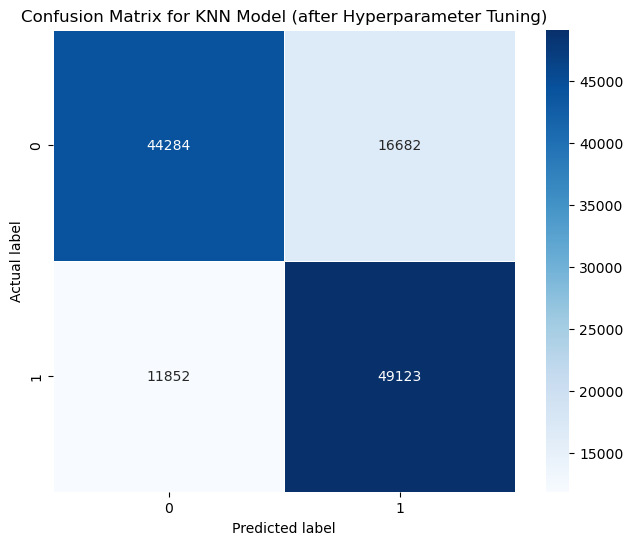

In [13]:
# Using a smaller subset of the data for hyperparameter tuning
tuning_subset_size_knn = 2000
X_train_tune_subset_knn = X_train[:tuning_subset_size_knn]
Y_train_tune_subset_knn = Y_train[:tuning_subset_size_knn]

# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # You can adjust this range based on your problem
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the KNN model
knn_model_tuned = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn_model_tuned, param_grid=param_grid_knn, scoring='precision', cv=5)

# Fit the model to the tuning subset
grid_search_knn.fit(X_train_tune_subset_knn, Y_train_tune_subset_knn)

# Print the best hyperparameters found
print("Best Hyperparameters for KNN:", grid_search_knn.best_params_)

# Get the best KNN model
best_knn_model = grid_search_knn.best_estimator_

# Predict on the testing set using the best model
Y_test_pred_best_knn = best_knn_model.predict(X_test)

# Evaluate the best model
best_testing_accuracy_knn = accuracy_score(Y_test, Y_test_pred_best_knn)
print("Best KNN Testing Accuracy:", best_testing_accuracy_knn)

# Display the classification report for the testing set with the best model
classification_rep_best_knn = classification_report(Y_test, Y_test_pred_best_knn)
print("Best KNN Classification Report (Testing Set):\n", classification_rep_best_knn)

# Overall precision for the best KNN model on the testing set
overall_precision_best_knn = precision_score(Y_test, Y_test_pred_best_knn)
print("Overall Precision for Best KNN Model:", overall_precision_best_knn)

# Compute confusion matrix for the best KNN model
cm_best_knn = confusion_matrix(Y_test, Y_test_pred_best_knn)

# Extracting TP, TN, FP, FN from confusion matrix
TN, FP, FN, TP = cm_best_knn.ravel()

# Displaying TP, TN, FP, FN along with the confusion matrix
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Plotting confusion matrix for the best KNN model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_knn, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True)
plt.title('Confusion Matrix for KNN Model (after Hyperparameter Tuning)')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

___

___

### MODEL 3: SVM (Support Vector Machine)

In [14]:
# Initializing the SVM model
svm_model = SVC(random_state=42)

# Using a subset of the data for faster execution
subset_size = 10000
X_train_subset = X_train[:subset_size]
Y_train_subset = Y_train[:subset_size]

# Training the SVM model on the training set subset
svm_model.fit(X_train_subset, Y_train_subset)

# Predicting the target variable on the training set
Y_train_pred_svm = svm_model.predict(X_train_subset)

# Predicting the target variable on the testing set
Y_test_pred_svm = svm_model.predict(X_test)

# Evaluating the SVM model on the training set
training_accuracy_svm = accuracy_score(Y_train_subset, Y_train_pred_svm)
print("SVM Training Accuracy:", training_accuracy_svm)

# Evaluating the SVM model on the testing set
testing_accuracy_svm = accuracy_score(Y_test, Y_test_pred_svm)
print("SVM Testing Accuracy:", testing_accuracy_svm)

# Displaying the classification report for the testing set
classification_rep_svm = classification_report(Y_test, Y_test_pred_svm)
print("SVM Classification Report (Testing Set):\n", classification_rep_svm)

# Overall precision for the SVM model on the testing set
overall_precision_svm = precision_score(Y_test, Y_test_pred_svm)
print("Overall Precision for SVM:", overall_precision_svm)

SVM Training Accuracy: 0.8037
SVM Testing Accuracy: 0.7973036140428568
SVM Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       1.00      0.59      0.75     60966
           1       0.71      1.00      0.83     60975

    accuracy                           0.80    121941
   macro avg       0.86      0.80      0.79    121941
weighted avg       0.86      0.80      0.79    121941

Overall Precision for SVM: 0.7115600056014564


### Trying Hyperparameter Tuning using GridSearchCV on a small subset of the dataset to improve the precision and the <u>precision was increased</u>

Best Hyperparameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best SVM Testing Accuracy: 0.8187320097424164
Best SVM Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       0.96      0.66      0.79     60966
           1       0.74      0.97      0.84     60975

    accuracy                           0.82    121941
   macro avg       0.85      0.82      0.81    121941
weighted avg       0.85      0.82      0.81    121941

Overall Precision for Best SVM Model: 0.7430318490452789
True Positives (TP): 59421
True Negatives (TN): 40416
False Positives (FP): 20550
False Negatives (FN): 1554


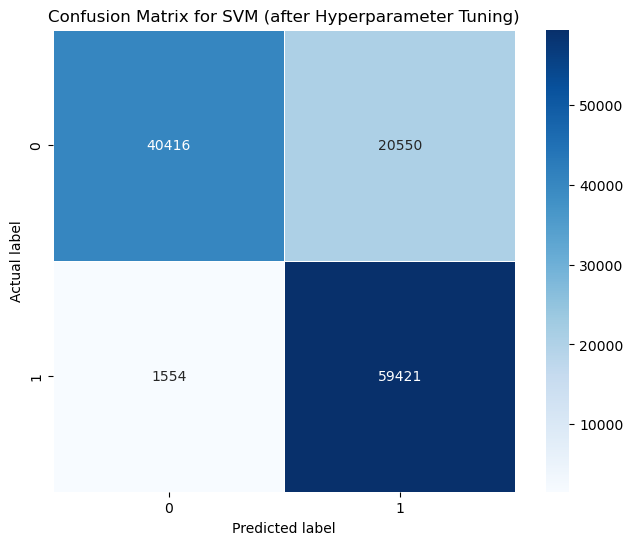

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Using a smaller subset of the data for hyperparameter tuning
tuning_subset_size = 2000
X_train_tune_subset = X_train[:tuning_subset_size]
Y_train_tune_subset = Y_train[:tuning_subset_size]

# Defining the parameter grid
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.01, 0.1, 1],
              'kernel': ['linear', 'rbf', 'poly']}

# Initializing the SVM model
svm_model = SVC(random_state=42)

# Initializing GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='precision', cv=5)

# Fitting the model to the tuning subset
grid_search.fit(X_train_tune_subset, Y_train_tune_subset)

# Printing the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Getting the best model
best_svm_model = grid_search.best_estimator_

# Predicting on the testing set using the best model
Y_test_pred_best_svm = best_svm_model.predict(X_test)

# Evaluating the best model
best_testing_accuracy_svm = accuracy_score(Y_test, Y_test_pred_best_svm)
print("Best SVM Testing Accuracy:", best_testing_accuracy_svm)

# Displaying the classification report for the testing set with the best model
classification_rep_best_svm = classification_report(Y_test, Y_test_pred_best_svm)
print("Best SVM Classification Report (Testing Set):\n", classification_rep_best_svm)

# Overall precision for the best SVM model on the testing set
overall_precision_best_svm = precision_score(Y_test, Y_test_pred_best_svm)
print("Overall Precision for Best SVM Model:", overall_precision_best_svm)

# Computing confusion matrix for the best SVM model
cm_best_svm = confusion_matrix(Y_test, Y_test_pred_best_svm)

# Extracting TP, TN, FP, FN from confusion matrix
TN, FP, FN, TP = cm_best_svm.ravel()

# Displaying TP, TN, FP, FN along with the confusion matrix
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Plotting confusion matrix for the best SVM model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_svm, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True)
plt.title('Confusion Matrix for SVM (after Hyperparameter Tuning)')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

___

___

### MODEL 4: Decision Tree

In [16]:
# Initializing the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Training the model on the training set
decision_tree_model.fit(X_train, Y_train)

# Predicting the target variable on the training set
Y_train_pred_tree = decision_tree_model.predict(X_train)

# Predicting the target variable on the testing set
Y_test_pred_tree = decision_tree_model.predict(X_test)

# Evaluating the Decision Tree model on the training set
training_accuracy_tree = accuracy_score(Y_train, Y_train_pred_tree)
print("Decision Tree Training Accuracy:", training_accuracy_tree)

# Evaluating the Decision Tree model on the testing set
testing_accuracy_tree = accuracy_score(Y_test, Y_test_pred_tree)
print("Decision Tree Testing Accuracy:", testing_accuracy_tree)

# Displaying the classification report for the testing set
classification_rep_tree = classification_report(Y_test, Y_test_pred_tree)
print("Decision Tree Classification Report (Testing Set):\n", classification_rep_tree)

# Overall precision for the Decision Tree model on the testing set
overall_precision_tree = precision_score(Y_test, Y_test_pred_tree)
print("Overall Precision for Decision Tree Model:", overall_precision_tree)

Decision Tree Training Accuracy: 0.8228723884085386
Decision Tree Testing Accuracy: 0.820355745811499
Decision Tree Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       0.99      0.65      0.78     60966
           1       0.74      0.99      0.85     60975

    accuracy                           0.82    121941
   macro avg       0.86      0.82      0.81    121941
weighted avg       0.86      0.82      0.81    121941

Overall Precision for Decision Tree Model: 0.7384728071781725


### Tried Hyperparameter Tuning for Decision Tree but there was <u>no improvement in the precision</u>

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Decision Tree Testing Accuracy: 0.820355745811499
Best Decision Tree Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       0.99      0.65      0.78     60966
           1       0.74      0.99      0.85     60975

    accuracy                           0.82    121941
   macro avg       0.86      0.82      0.81    121941
weighted avg       0.86      0.82      0.81    121941

Overall Precision for Best Decision Tree Model: 0.7384728071781725
True Positives (TP): 60492
True Negatives (TN): 39543
False Positives (FP): 21423
False Negatives (FN): 483


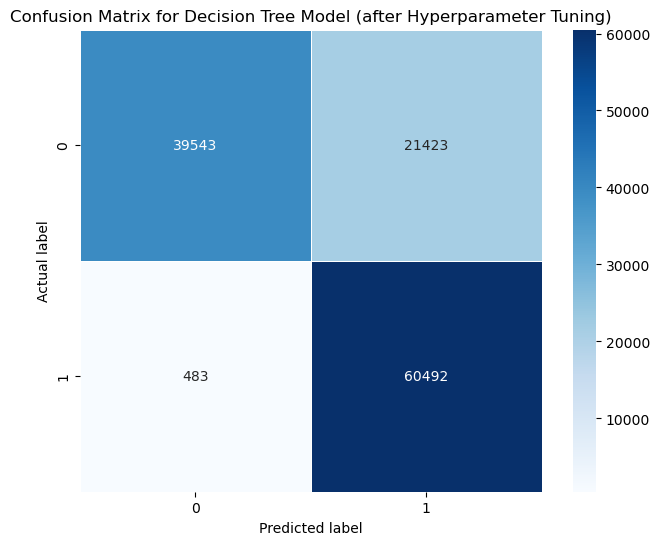

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Defining the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Initializing GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid, scoring='precision', cv=5)

# Fitting the model to the training data
grid_search.fit(X_train, Y_train)

# Printing the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Getting the best model
best_decision_tree_model = grid_search.best_estimator_

# Predicting on the testing set using the best model
Y_test_pred_best_tree = best_decision_tree_model.predict(X_test)

# Evaluating the best model
best_testing_accuracy_tree = accuracy_score(Y_test, Y_test_pred_best_tree)
print("Best Decision Tree Testing Accuracy:", best_testing_accuracy_tree)

# Displaying the classification report for the testing set with the best model
classification_rep_best_tree = classification_report(Y_test, Y_test_pred_best_tree)
print("Best Decision Tree Classification Report (Testing Set):\n", classification_rep_best_tree)

# Overall precision for the best Decision Tree model on the testing set
overall_precision_best_tree = precision_score(Y_test, Y_test_pred_best_tree)
print("Overall Precision for Best Decision Tree Model:", overall_precision_best_tree)

# Computing confusion matrix for the best Decision Tree model
cm_best_tree = confusion_matrix(Y_test, Y_test_pred_best_tree)

# Extracting TP, TN, FP, FN from confusion matrix
TN, FP, FN, TP = cm_best_tree.ravel()

# Displaying TP, TN, FP, FN along with the confusion matrix
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Plotting confusion matrix for the best Decision Tree model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_tree, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True)
plt.title('Confusion Matrix for Decision Tree Model (after Hyperparameter Tuning)')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

___

___

### MODEL 5: Random Forest

In [18]:
# Initializing the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Training the model on the training set
random_forest_model.fit(X_train, Y_train)

# Predicting the target variable on the training set
Y_train_pred_rf = random_forest_model.predict(X_train)

# Predicting the target variable on the testing set
Y_test_pred_rf = random_forest_model.predict(X_test)

# Evaluating the Random Forest model on the training set
training_accuracy_rf = accuracy_score(Y_train, Y_train_pred_rf)
print("Random Forest Training Accuracy:", training_accuracy_rf)

# Evaluating the Random Forest model on the testing set
testing_accuracy_rf = accuracy_score(Y_test, Y_test_pred_rf)
print("Random Forest Testing Accuracy:", testing_accuracy_rf)

# Displaying the classification report for the testing set
classification_rep_rf = classification_report(Y_test, Y_test_pred_rf)
print("Random Forest Classification Report (Testing Set):\n", classification_rep_rf)

# Overall precision for the Random Forest model on the testing set
overall_precision_rf = precision_score(Y_test, Y_test_pred_rf)
print("Overall Precision for Random Forest Model:", overall_precision_rf)

Random Forest Training Accuracy: 0.8228723884085386
Random Forest Testing Accuracy: 0.8203721471859342
Random Forest Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       0.99      0.65      0.78     60966
           1       0.74      0.99      0.85     60975

    accuracy                           0.82    121941
   macro avg       0.86      0.82      0.81    121941
weighted avg       0.86      0.82      0.81    121941

Overall Precision for Random Forest Model: 0.7384733700362553


### Tried Hyperparameter Tuning for Random Forest on a small subset of dataset but the <u>precision was  increased</u>

/Users/pranavramesh/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/pranavramesh/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/pranavramesh/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/pranavramesh/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parame

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Random Forest Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       0.97      0.66      0.78     60966
           1       0.74      0.98      0.84     60975

    accuracy                           0.82    121941
   macro avg       0.86      0.82      0.81    121941
weighted avg       0.86      0.82      0.81    121941

Best Random Forest Accuracy on Testing Set: 0.818740210429634
Overall Precision for Best Random Forest Model: 0.7406577350734256
True Positives (TP): 59817
True Negatives (TN): 40021
False Positives (FP): 20945
False Negatives (FN): 1158


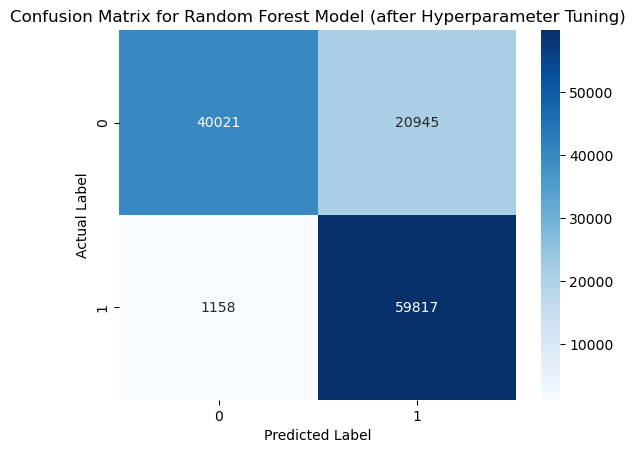

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a subset of the training data for hyperparameter tuning
subset_size_tuning = 2000  # Adjust the size based on your computational resources
X_train_subset_tuning = X_train[:subset_size_tuning]
Y_train_subset_tuning = Y_train[:subset_size_tuning]

# Defining the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initializing the Random Forest model
random_forest_model_tuning = RandomForestClassifier(random_state=42)

# Initializing GridSearchCV
grid_search_rf_tuning = GridSearchCV(estimator=random_forest_model_tuning, param_grid=param_grid, scoring='precision', cv=5)

# Fitting the model to the training data subset for tuning
grid_search_rf_tuning.fit(X_train_subset_tuning, Y_train_subset_tuning)

# Printing the best hyperparameters found
print("Best Hyperparameters:", grid_search_rf_tuning.best_params_)

# Getting the best model
best_random_forest_model_tuning = grid_search_rf_tuning.best_estimator_

# Predicting on the testing set using the best model
Y_test_pred_best_rf_tuning = best_random_forest_model_tuning.predict(X_test)

# Displaying the classification report for the testing set with the best model
classification_rep_best_rf_tuning = classification_report(Y_test, Y_test_pred_best_rf_tuning)
print("Best Random Forest Classification Report (Testing Set):\n", classification_rep_best_rf_tuning)

# Evaluating the best model
best_testing_accuracy_rf_tuning = accuracy_score(Y_test, Y_test_pred_best_rf_tuning)
print("Best Random Forest Accuracy on Testing Set:", best_testing_accuracy_rf_tuning)

# Overall precision for the best Random Forest model on the testing set
overall_precision_best_rf_tuning = precision_score(Y_test, Y_test_pred_best_rf_tuning)
print("Overall Precision for Best Random Forest Model:", overall_precision_best_rf_tuning)

# Computing confusion matrix for the best Random Forest model
cm_best_rf_tuning = confusion_matrix(Y_test, Y_test_pred_best_rf_tuning)

# Extracting TP, TN, FP, FN from confusion matrix
TN, FP, FN, TP = cm_best_rf_tuning.ravel()

# Displaying TP, TN, FP, FN along with the confusion matrix
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Visualizing the confusion matrix
sns.heatmap(cm_best_rf_tuning, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Random Forest Model (after Hyperparameter Tuning)')
plt.show()

___

___

## Visualization of Performance metric ("Precision") of Models

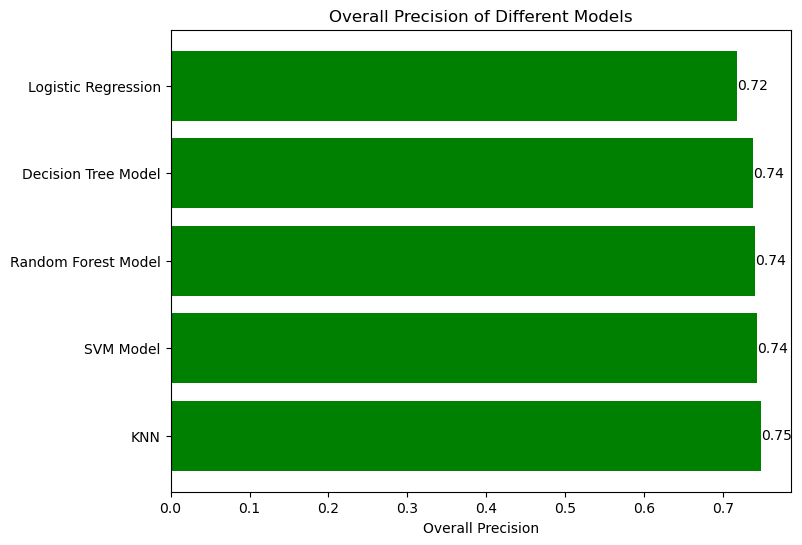

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Overall precision values
precision_values = [0.7178768376304603, 0.748209407073765, 0.7430318490452789, 0.7384728071781725, 0.7406577350734256]

# Algorithms
algorithms = ['Logistic Regression', 'KNN', 'SVM Model', 'Decision Tree Model', 'Random Forest Model']

# Sorting values and algorithms in descending order
sorted_indices = sorted(range(len(precision_values)), key=lambda k: precision_values[k], reverse=True)
sorted_precision = [precision_values[i] for i in sorted_indices]
sorted_algorithms = [algorithms[i] for i in sorted_indices]

# Plotting the horizontal bar plot with precision values labeled
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(sorted_algorithms, sorted_precision, color='green')

# Adding precision values directly on the bars (rounded to 2 decimal places)
for bar, precision in zip(bars, sorted_precision):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{precision:.2f}', va='center')

ax.set_xlabel('Overall Precision')
ax.set_title('Overall Precision of Different Models')
plt.show()
